In [3]:
import requests
from pathlib import Path

if Path("helper_function.py").is_file():
    print("present")
else:
    print("downloading")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py") 
    with open("helper_function.py","wb") as f:
        f.write(request.content) 

present


In [4]:
import torch 
import torch.nn as nn  
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
import torch.nn as optim

In [5]:
X , y = make_blobs(n_samples=1000,
                   n_features=2,
                   centers=4,
                   cluster_std=1.5,
                   random_state=42)

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=42)

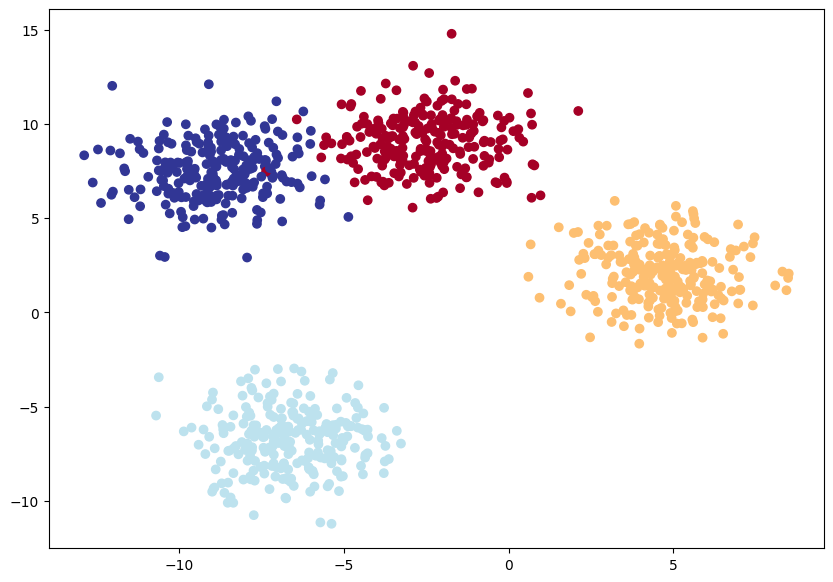

In [6]:
plt.figure(figsize=(10,7))
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [7]:
class B_model(nn.Module):
    def __init__(self,input_features,
                 output_features,
                 hidden_units = 8
                 ):
        
        """
        initialize a multi class classification model
        
        Args:
        input_features (int): number of input features to the model
        output_features (int): number of output classes
        hidden_unit (int): Number of hidden units between layers, default 8
        """        
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(input_features,hidden_units),
            nn.Tanh(),
            nn.Linear(hidden_units,hidden_units),
            nn.Tanh(),
            nn.Linear(hidden_units,hidden_units),            
            nn.Tanh(),
            nn.Linear(hidden_units,output_features)
        )
        
    def forward(self,x):
        return self.network(x)

In [8]:
Model = B_model(input_features=2,output_features=4,hidden_units=8)
loss_fcn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=Model.parameters(),lr=0.01)

B_model(
  (network): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Tanh()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): Tanh()
    (4): Linear(in_features=8, out_features=8, bias=True)
    (5): Tanh()
    (6): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [9]:
def accuracy(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100 
    return acc

### MODEL RESULT
model output (logits) --> activation function (prediction probabilities) --> softmax (figure out the class)

In [10]:
with torch.inference_mode():
    pred = Model(X_train) # model output 
    pred_prob = torch.softmax(pred,dim=1) # prediction probabilities
#plt.scatter(pred[:5],pred[:5])
#plt.scatter(pred_prob[:5],pred[:5])
print(pred[0])
print(pred_prob[0])
preds_class = torch.argmax(pred_prob,1)
torch.sum(pred_prob[0])
x = torch.argmax(pred_prob,dim=1)


tensor([-0.1626, -0.2553,  0.0451, -0.1986])
tensor([0.2435, 0.2219, 0.2997, 0.2349])


In [22]:
epochs = 100
for epoch in range(epochs):
    #----Traing----#
    Model.train()
    
    #1. Model training 
    pred = Model(X_train)
    pred_prob = torch.softmax(pred,dim=1).argmax(dim=1)
    
    #2. accuracy and loss calculation
    loss = loss_fcn(pred,y_train.type(torch.LongTensor))
    acc = accuracy(y_train,pred_prob)
    
    #3. set optimizer and perform backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    Model.eval()
    
    with torch.inference_mode():
        test_pred = Model(X_test)
        test_prob = torch.softmax(test_pred,dim=1).argmax(dim=1)
        test_loss = loss_fcn(test_pred,y_test.type(torch.LongTensor))
        test_acc = accuracy(y_test,test_prob)
    
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} |, loss : {loss:.4f} |, Acc: | {acc:.2f}% |, Test loss | {test_loss:.3f}, | test accuracy | {test_acc:.2f}% ")
     

Epoch: 0 |, loss : 0.3130 |, Acc: | 97.38% |, Test loss | 0.290, | test accuracy | 99.00% 
Epoch: 10 |, loss : 0.3074 |, Acc: | 97.38% |, Test loss | 0.284, | test accuracy | 99.00% 
Epoch: 20 |, loss : 0.3019 |, Acc: | 97.38% |, Test loss | 0.279, | test accuracy | 99.00% 
Epoch: 30 |, loss : 0.2965 |, Acc: | 97.38% |, Test loss | 0.274, | test accuracy | 99.00% 
Epoch: 40 |, loss : 0.2911 |, Acc: | 97.50% |, Test loss | 0.269, | test accuracy | 99.00% 
Epoch: 50 |, loss : 0.2858 |, Acc: | 97.50% |, Test loss | 0.264, | test accuracy | 99.00% 
Epoch: 60 |, loss : 0.2806 |, Acc: | 97.75% |, Test loss | 0.259, | test accuracy | 99.00% 
Epoch: 70 |, loss : 0.2754 |, Acc: | 98.00% |, Test loss | 0.254, | test accuracy | 99.00% 
Epoch: 80 |, loss : 0.2703 |, Acc: | 98.00% |, Test loss | 0.250, | test accuracy | 99.00% 
Epoch: 90 |, loss : 0.2654 |, Acc: | 98.12% |, Test loss | 0.245, | test accuracy | 99.00% 


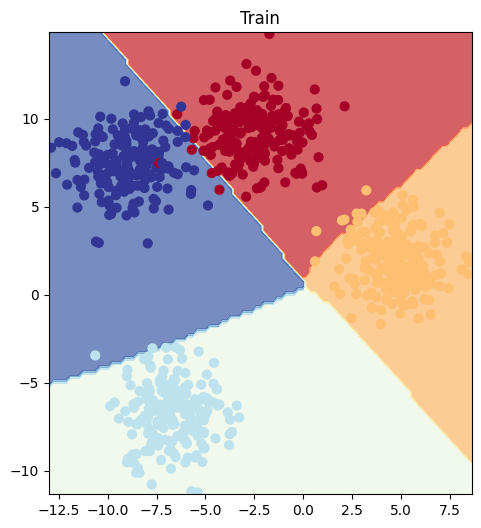

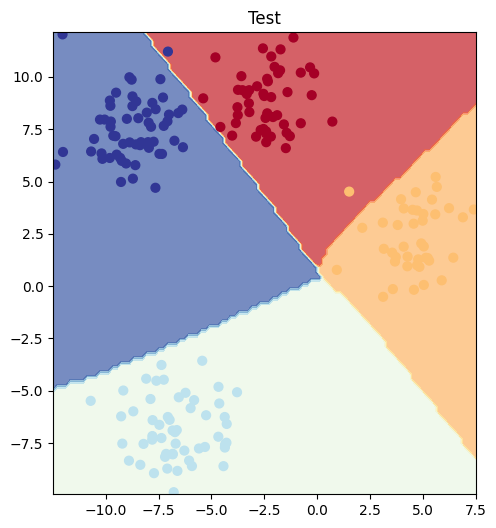

In [23]:
from helper_function import plot_decision_boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(Model,X_train,y_train)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Test")
plot_decision_boundary(Model,X_test,y_test)
